In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split as split
from sklearn import metrics

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, target = make_blobs(n_samples = 300, centers = 5,
                  random_state = 0, cluster_std = 0.75) 
# cluster_std ~ Determines How Far Apart The Points Will Be

In [3]:
X_train, X_test, target_train, target_test = \
    split(X, target, test_size = 0.20, random_state = 2)

In [4]:
X_train.shape
target_train.shape

(240,)

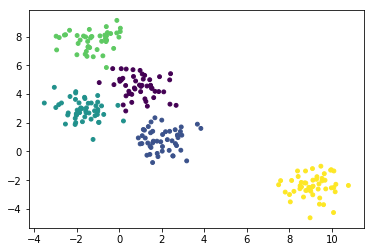

In [5]:
plt.scatter(X_train[:, 0], X_train[:, 1], c = target_train, s = 15); 
# s = Size Of Points, c = Set Color to Targets

In [6]:
def plot_data(classifer, X, target):
    classifier.fit(X, target)
    
    # Set The Mimimum/Maximum Value for the X-axis
    x_min = X[:, 0].min() - .3
    x_max = X[:, 0].max() + .3
        
    # Set the Minimum/Maximum Value for the Y-axis
    y_min = X[:, 1].min() - .3
    y_max = X[:, 1].max() + .3
    
    # Create a MeshGrid Using The Minimum/Maximum Ranges for the Axes
    xx, yy = np.meshgrid(np.linspace(x_min, x_max),
                         np.linspace(y_min, y_max))
    
    # ravel() Function Returns a 1-D Array
    # np.c_[] Function Concatenates the Two 1-D Array into a Single 2-D Array
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.pcolormesh(xx, yy, Z, alpha=0.45)

    # Plot Points
    plt.scatter(X[:, 0], X[:, 1], c = target, s=50)
    plt.axis('tight')
    plt.axis('off')
    plt.tight_layout()

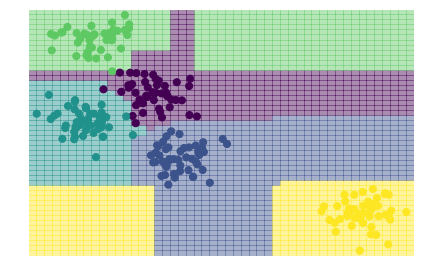

In [7]:
classifier = RandomForestClassifier()
classifier.fit(X_train, target_train)
plot_data(classifier, X_train, target_train)

In [8]:
prediction = classifier.predict(X_test)
accuracy = metrics.accuracy_score
print (accuracy(target_test, prediction)*100, "% Accuracy")

98.3333333333 % Accuracy


In [9]:
print(classifier.predict([[-1.02, -4.1]]))
print(target[1])

[4]
3


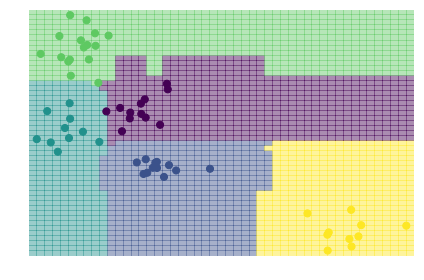

In [10]:
# Test Data
classifier.fit(X_test, target_test)
plot_data(classifier, X_test, target_test)

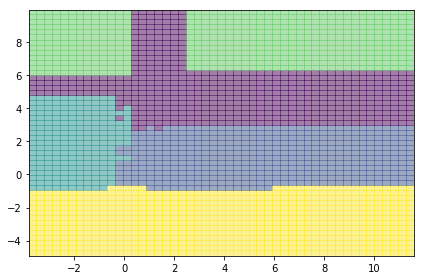

In [11]:
classifier = RandomForestClassifier()
classifier.fit(X, target)
    
# Set The Mimimum/Maximum Value for the X-axis
x_min = X[:, 0].min() - .3
x_max = X[:, 0].max() + .3
        
# Set the Minimum/Maximum Value for the Y-axis
y_min = X[:, 1].min() - .3
y_max = X[:, 1].max() + .3
    
# Create a MeshGrid Using The Minimum/Maximum Ranges for the Axes
xx, yy = np.meshgrid(np.linspace(x_min, x_max), np.linspace(y_min, y_max))
    

# .c_ function concatenates, ravel()

# Apply Decision Tree Classifier on 2-Dimensional Meshgrid
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])


Z = Z.reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, alpha=0.5)

# Plot Mesh Graph
plt.axis('tight')
plt.tight_layout()

In [12]:
print("Shape of xx and yy Meshgrid:")
print(xx.shape,yy.shape)

a = xx.ravel()
b = yy.ravel()
c = np.c_[xx.ravel(), yy.ravel()]

print()
print("Shape of xx and yy After Applying Ravel and Concantenating:")
print(a.shape, b.shape, c.shape)

Shape of xx and yy Meshgrid:
(50, 50) (50, 50)

Shape of xx and yy After Applying Ravel and Concantenating:
(2500,) (2500,) (2500, 2)
